# Homework 3: Convolutional Neural Networks

Due Wednesday 11/24 at 11:59 pm EST

Download the dataset `cats-notcats` from github (given as a part of the assignment). This dataset has images of cats and images that are not cats (in separate folders). The task is to train a convolutional neural network (CNN) to build a classifier that can classify a new image as either `cat` or `not cat`

1. Load the dataset and create three stratified splits - train/validation/test in the ratio of 70/10/20. 

In [ ]:
import os
import cv2
import re
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#code here
input_size = (128,128)
cat = [] 
not_cat = []
def read_directory(directory_name,l):
    for filename in os.listdir(r"./"+directory_name):
        if re.search(r'[0-9]',filename):
            img = cv2.imread(directory_name + "/" + filename)
            # img = cv2.imread(directory_name + "/" + filename,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,input_size)
            l.append(img)
    return l
file_cat = 'data/cats-notcats/cats'
file_no_cat = 'data/cats-notcats/notcats'
cat = read_directory(file_cat,cat)
not_cat = read_directory(file_no_cat,not_cat)
input_fig = cat+not_cat

target = [1]*len(cat)+[0]*len(not_cat)

In [ ]:
X_dev,X_test,y_dev,y_test = train_test_split(cat+not_cat,target,test_size = 0.2,stratify=target, random_state=123)
X_train,X_val,y_train,y_val = train_test_split(X_dev,y_dev,test_size = 0.125,stratify=y_dev, random_state=123)

In [ ]:
# X_dev = np.asarray(X_dev).astype(np.float32)
# y_dev = np.asarray(y_dev).astype(np.float32)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],input_size[0],input_size[1],3)
X_val = X_val.reshape(X_val.shape[0],input_size[0],input_size[1],3)
X_test = X_test.reshape(X_test.shape[0],input_size[0],input_size[1],3)

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1./255)
val_datagen = ImageDataGenerator( rescale = 1./255)
train_generator = train_datagen.flow(X_train,y_train)
val_generator = val_datagen.flow(X_val,y_val)

2. Create a CNN that has the following hidden layers:

    a. 2D convolution layer with a 3x3 kernel size, has 128 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. Dense layer with 128 dimensions and ReLU as the activation layer

In [ ]:
#code here
num_classes = 2
input_shape = (128,128,3)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
cnn = models.Sequential()
cnn.add(layers.Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same',strides=1,input_shape = input_shape))
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128,activation = 'relu'))
cnn.add(layers.Dense(1,activation = 'sigmoid'))
# cnn.add(layers.Dense(2,activation = 'softmax'))

3. Train the classifier for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [ ]:
# cnn.compile("adam",'categorical_crossentropy',metrics = ['accuracy'])
cnn.compile("adam",'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = cnn.fit_generator(train_generator,epochs = 20, steps_per_epoch = 100,
                      validation_data = val_generator, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
100/100 [==============================] - 133s 1s/step - loss: 1.0139 - accuracy: 0.7943 - val_loss: 0.3705 - val_accuracy: 0.8554
Epoch 2/20
100/100 [==============================] - 132s 1s/step - loss: 0.3411 - accuracy: 0.8684 - val_loss: 0.3535 - val_accuracy: 0.8554
Epoch 3/20
100/100 [==============================] - 132s 1s/step - loss: 0.2452 - accuracy: 0.9112 - val_loss: 0.3438 - val_accuracy: 0.8607
Epoch 4/20
100/100 [==============================] - 141s 1s/step - loss: 0.1617 - accuracy: 0.9450 - val_loss: 0.3595 - val_accuracy: 0.8730
Epoch 5/20
100/100 [==============================] - 135s 1s/step - loss: 0.0973 - accuracy: 0.9687 - val_loss: 0.5539 - val_accuracy: 0.8571
Epoch 6/20
100/100 [==============================] - 135s 1s/step - loss: 0.0651 - accuracy: 0.9819 - val_loss: 0.4882 - val_accuracy: 0.8607
Epoch 7/20
100/100 [==============================] - 135s 1s/step - loss: 0.0522 - accuracy: 0.9872 - val_loss: 0.4721 - val_accuracy: 0.8607

4. Plot the accuracy and the loss over epochs for train & validation sets

(0.5, 1.0)

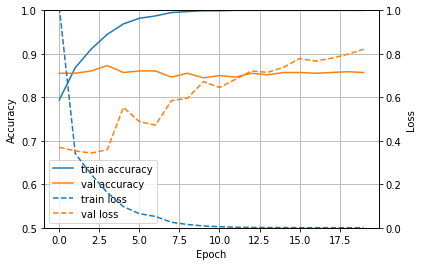

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(history.history['accuracy'], label='train accuracy')
lns2 = ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax2 = ax.twinx()
lns3 = ax2.plot(history.history['loss'], '--',label='train loss')
lns4 = ax2.plot(history.history['val_loss'], '--',label = 'val loss')

# added these three lines
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax2.set_ylabel("Loss")
ax2.set_ylim(0, 1)
ax.set_ylim(0.5,1)


5. Add the following layers to (2) before the dense layer:

    a. 2D convolution layer with a 3x3 kernel size, has 64 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. 2D convolution layer with a 3x3 kernel size, has 32 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    d. Max pooling layer of 2x2
    
    e. Dense layer with 256 dimensions and ReLU as the activation layer

In [ ]:
#code here
cnn = models.Sequential()
cnn.add(layers.Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same',strides=1))
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn.add(layers.Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same',strides=1))
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128,activation = 'relu'))
cnn.add(layers.Dense(1,activation = 'sigmoid'))

6. Train the classifier again for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [ ]:
#code here
# cnn.compile("adam",'categorical_crossentropy',metrics = ['accuracy'])
cnn.compile("adam",'binary_crossentropy',metrics = ['accuracy'])
history = cnn.fit_generator(train_generator,epochs = 20, steps_per_epoch = 100,
                      validation_data = val_generator,verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
100/100 [==============================] - 190s 2s/step - loss: 0.5737 - accuracy: 0.7437 - val_loss: 0.4553 - val_accuracy: 0.7954
Epoch 2/20
100/100 [==============================] - 188s 2s/step - loss: 0.5054 - accuracy: 0.7890 - val_loss: 0.4169 - val_accuracy: 0.8466
Epoch 3/20
100/100 [==============================] - 187s 2s/step - loss: 0.4525 - accuracy: 0.8140 - val_loss: 0.4647 - val_accuracy: 0.8219
Epoch 4/20
100/100 [==============================] - 187s 2s/step - loss: 0.3941 - accuracy: 0.8384 - val_loss: 0.3831 - val_accuracy: 0.8483
Epoch 5/20
100/100 [==============================] - 187s 2s/step - loss: 0.3515 - accuracy: 0.8587 - val_loss: 0.3493 - val_accuracy: 0.8571
Epoch 6/20
100/100 [==============================] - 186s 2s/step - loss: 0.3294 - accuracy: 0.8728 - val_loss: 0.3763 - val_accuracy: 0.8536
Epoch 7/20
100/100 [==============================] - 187s 2s/step - loss: 0.2737 - accuracy: 0.8881 - val_loss: 0.3645 - val_accuracy: 0.8571

7. Plot the accuracy and the loss over epochs for train & validation sets

(0.5, 1.0)

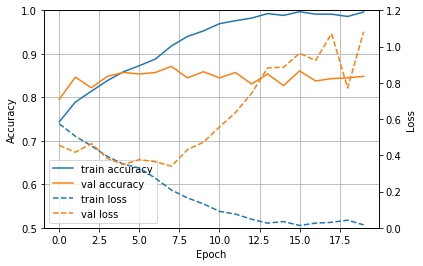

In [ ]:
#code here
fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(history.history['accuracy'], label='train accuracy')
lns2 = ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax2 = ax.twinx()
lns3 = ax2.plot(history.history['loss'], '--',label='train loss')
lns4 = ax2.plot(history.history['val_loss'], '--',label = 'val loss')

# added these three lines
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax2.set_ylabel("Loss")
ax2.set_ylim(0, 1.2)
ax.set_ylim(0.5,1)